In [2]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import missingno as msgn

In [3]:
data_rating = pd.read_csv("C:/Users/kara/Downloads/ratings_Beauty.csv/ratings_Beauty.csv")

In [4]:
data_products = pd.read_csv("C:/Users/kara/Downloads/archive (2)/BigBasket Products.csv")

In [5]:
data_rating

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
...,...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,1405296000
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,1405296000
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,1405382400
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,1405555200


In [6]:
data_products

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
...,...,...,...,...,...,...,...,...,...,...
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...
27552,27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori..."


In [7]:
data_products.describe()

,index,sale_price,market_price,rating
count,27555.00000,27555.000000,27555.000000,18929.000000
mean,13778.00000,322.514808,382.056664,3.943410
std,7954.58767,486.263116,581.730717,0.739063
min,1.00000,2.450000,3.000000,1.000000
25%,6889.50000,95.000000,100.000000,3.700000
50%,13778.00000,190.000000,220.000000,4.100000
75%,20666.50000,359.000000,425.000000,4.300000
max,27555.00000,12500.000000,12500.000000,5.000000


In [8]:
data_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


array([[<Axes: title={'center': 'index'}>,
        <Axes: title={'center': 'sale_price'}>],
       [<Axes: title={'center': 'market_price'}>,
        <Axes: title={'center': 'rating'}>]], dtype=object)

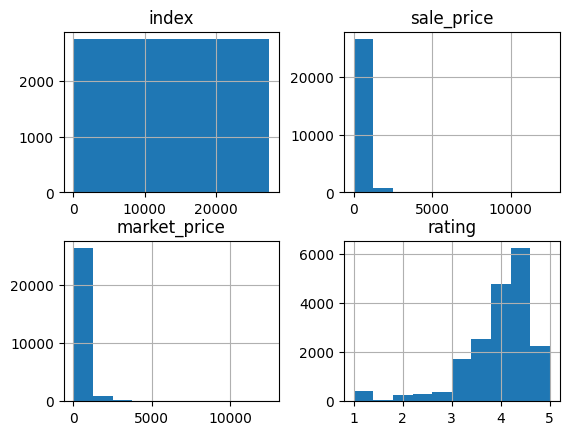

In [9]:
data_products.hist()

# Simple collabrative item based recommander system

In [10]:
data_rating['ProductId'].nunique(), data_rating['UserId'].nunique()

(249274, 1210271)

In [11]:
count_products = pd.DataFrame(data_rating['ProductId'].value_counts())

In [12]:
rare_products = count_products[count_products['count'] <= 500].index

In [14]:
common_products = data_rating[~data_rating["ProductId"].isin(rare_products)]
common_products.shape

(147376, 4)

In [15]:
common_products.reset_index(inplace= True)

In [16]:
common_products['Rating'] = common_products['Rating'].astype(np.int8)

C:\Users\kara\AppData\Local\Temp\ipykernel_4328\1837602919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  common_products['Rating'] = common_products['Rating'].astype(np.int8)


In [17]:
common_products.drop(columns= ['Timestamp', 'index'], axis = 1, inplace=True)

C:\Users\kara\AppData\Local\Temp\ipykernel_4328\1731977954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  common_products.drop(columns= ['Timestamp', 'index'], axis = 1, inplace=True)


In [18]:
rating_matrix = common_products.pivot_table(index = ["UserId"],columns = ['ProductId'], values = "Rating")
rating_matrix

ProductId,B00004TUBL,B0000530ED,B00005O0MZ,B0000632EN,B00006IV2F,B0000AFUTL,B0000CC64W,B0000YUXI0,B0000ZLEFU,B00011QUDE,...,B00C7DYBX0,B00CFRBIC0,B00CNOUZE2,B00D6EDGYE,B00E68O4JU,B00FAEOCP0,B00GFBWWWC,B00GP184WO,B00I073WLE,B00IALDHDI
UserId,,,,,,,,,,,,,,,,,,,,,
A00120381FL204MYH7G3B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A00262022JQPXX5SXEVJR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A00275441WYR3489IKNAB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A00328401T70RFN4P1IT6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A00454102SR84NOYTI0JS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZZS69U1WDPXV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZZSAMMJPJKJ1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZZT1ERHBSNQ8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
product = rating_matrix['B00004TUBL']
similarity = rating_matrix.corrwith(product)
similarity.sort_values(ascending=False).head(5)

C:\Users\kara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\kara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\kara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= s

ProductId
B00004TUBL    1.0
B0085WHBHU    1.0
B0043OYFKU    1.0
B0047ETXD0   -1.0
B0000530ED    NaN
dtype: float64

# USING SVD method

In [ ]:
## this code only run in kaggle##
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy
import pandas as pd

file_path = '/kaggle/input/amazon-ratings/ratings_Beauty.csv'


df = pd.read_csv(file_path)
df_sampled = df.sample(n=2000, random_state=42)


reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)

data = Dataset.load_from_df(df_sampled[['UserId', 'ProductId', 'Rating']], reader)

trainset, testset = train_test_split(data, test_size=0.25, random_state=42)


model = SVD()
model.fit(trainset)


predictions = model.test(testset)

accuracy.rmse(predictions)

reported RMSE: 1.3192252722205793

some prediction rates:

[Prediction(uid='AW53A7Y3H416D', iid='B000WHZVD2', r_ui=5.0, est=4.108, details={'was_impossible': False}),
 Prediction(uid='A17LVSTTLGTTDW', iid='B003EBNLIA', r_ui=5.0, est=4.108, details={'was_impossible': False}),
 Prediction(uid='A1WW7MRCX1Z4QO', iid='B000V1GHMS', r_ui=5.0, est=4.108, details={'was_impossible': False}),
 Prediction(uid='A12ETYDDOP09PE', iid='B000EPJNMW', r_ui=5.0, est=3.9275601495115118, details={'was_impossible': False}),
 Prediction(uid='A1QZXMRDLFXKUE', iid='B007D1Q8SM', r_ui=4.0, est=4.108, details={'was_impossible': False}),
 Prediction(uid='AJEJCGHYQFN9S', iid='B0009RF8E2', r_ui=5.0, est=4.108, details={'was_impossible': False}),
 Prediction(uid='A13E8Q3QY414B8', iid='B000A3TBB6', r_ui=5.0, est=4.108, details={'was_impossible': False}),
 Prediction(uid='A2O8RR59GF5LYP', iid='B001OTQXES', r_ui=5.0, est=4.108, details={'was_impossible': False}),
 Prediction(uid='A2U2MSG3EGTKJG', iid='B001N0QDQ6', r_ui=5.0, est=4.108, details={'was_impossible': False})]

# Content-based recommender system 

In [25]:
def visualise_features(data):
    cols = list(data.columns)
    for col in cols:
        print(f"col name: {col}\nuniques: {data[col].loc[-100:].unique()}\nnumber  of uniques{data[col].loc[-100:].nunique()}\ntype: {type(data[col][0])}")
        print(150 * '-')

In [26]:
visualise_features(data_products)

col name: index
uniques: [    1     2     3 ... 27553 27554 27555]
number  of uniques27555
type: <class 'numpy.int64'>
------------------------------------------------------------------------------------------------------------------------------------------------------
col name: product
uniques: ['Garlic Oil - Vegetarian Capsule 500 mg' 'Water Bottle - Orange'
 'Brass Angle Deep - Plain, No.2' ...
 'Wottagirl! Perfume Spray - Heaven, Classic'
 'Peri-Peri Sweet Potato Chips' 'Green Tea - Pure Original']
number  of uniques23540
type: <class 'str'>
------------------------------------------------------------------------------------------------------------------------------------------------------
col name: category
uniques: ['Beauty & Hygiene' 'Kitchen, Garden & Pets' 'Cleaning & Household'
 'Gourmet & World Food' 'Foodgrains, Oil & Masala'
 'Snacks & Branded Foods' 'Beverages' 'Bakery, Cakes & Dairy' 'Baby Care'
 'Fruits & Vegetables' 'Eggs, Meat & Fish']
number  of uniques11
type: <clas

# Cleaning data

In [27]:
data_products

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
...,...,...,...,...,...,...,...,...,...,...
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...
27552,27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori..."


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
features_data = data_products.drop(columns=['product', 'sale_price', 'market_price', 'rating', 'index', 'description'], axis = 1).dropna(axis = 0)
features_data

,category,sub_category,brand,type
0,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,Hair Oil & Serum
1,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,Water & Fridge Bottles
2,Cleaning & Household,Pooja Needs,Trm,Lamp & Lamp Oil
3,Cleaning & Household,Bins & Bathroom Ware,Nakoda,"Laundry, Storage Baskets"
4,Beauty & Hygiene,Bath & Hand Wash,Nivea,Bathing Bars & Soaps
...,...,...,...,...
27550,Beauty & Hygiene,Fragrances & Deos,Layerr,Perfume
27551,Gourmet & World Food,Cooking & Baking Needs,Puramate,"Herbs, Seasonings & Rubs"
27552,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,Nachos & Chips
27553,Beverages,Tea,Tetley,Tea Bags


In [30]:
features_data.columns

Index(['category', 'sub_category', 'brand', 'type'], dtype='object')

In [31]:
import scipy.sparse as sp

In [32]:
def tfidf_calculate(data):

    tfidf_vectorizer = TfidfVectorizer()
    tfidf_df = []
    for col in data.columns:
        tfidf_df.append(tfidf_vectorizer.fit_transform(data[col]))
    tfidf_df = sp.hstack(tfidf_df)

    return tfidf_df

In [33]:
final = tfidf_calculate(features_data.sample(2000, random_state=42))

In [34]:
final.todense().shape

(2000, 1791)

In [35]:
final = final.astype(np.float32)
final

<2000x1791 sparse matrix of type '<class 'numpy.float32'>'
	with 17253 stored elements in Compressed Sparse Row format>

In [36]:
from sklearn.metrics.pairwise import cosine_similarity

In [37]:
similarity_matrix = cosine_similarity(final, final)

In [38]:
similarity_matrix.shape

(2000, 2000)

In [39]:
indices = pd.Series(data_products.sample(2000, random_state=42).reset_index().index, index = data_products.sample(2000, random_state=42)['product'])

In [40]:
def recommend(product_name, num_recommendation=10, cosine_sim=similarity_matrix):
    idx = indices[product_name]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_recommendation + 1]
    index_of_product = [i[0] for i in sim_scores]
    return data_products.sample(2000, random_state=42).reset_index()['product'].iloc[index_of_product].unique().tolist(), sim_scores

In [48]:
products, scores = recommend('Breakfast Mix - Masala Idli' )

In [49]:
scores_cosine = [t[1] for t in scores]
recommendations = pd.DataFrame(np.array([products, scores_cosine], dtype=np.object_))
display(recommendations.T)

,0,1
0,Breakfast Mix - Masala Idli,1.0
1,Ready Mix - Vermicelli Payasam,0.831258
2,Mix - Gulab Jamun,0.831258
3,Newyork Deodorant Spray,0.75
4,Ayurvedic Amla Powder,0.75
5,Chutney Powder - Idli Dosa,0.75
6,Celeste & Sheer Perfume For Women,0.75
7,Ready To Eat - Sambar Rice,0.75
8,Instant Mix - Ragi Idli,0.75
9,Purifying Cleanser,0.75


In [ ]:
def calculate_score(cosine, threshold):

    score = np.array(cosine) >= threshold

    precision = score.sum() / len(score)

    return precision

In [ ]:
def evaluation():
    data = data_products.sample(n = 2000, random_state=42).reset_index().sample(100, random_state=42)
    products = list(data['product'])
    precision = 0
    for i in range(100):
        names, scores = recommend(products[i])
        final = [t[1] for t in scores]
        precision += calculate_score(final, 0.7)
    return precision / 100

In [ ]:
evaluation()

precision is:  0.89
